##### Plan pour préparer son dataset

* Data cleaning (outliers, NA value, ...)
* Feature selection(si besoin)
* Etudes des corrélations
* Variables d'importances
* Régression pénalisée
* Stats descriptives
* Feature engineering adatpé à vos besoins
* Discrétiser vos données continues
* Recoder variables catégorielles
* Ajouter des transformations de features
* Agréger des features
* Feature scaling
* Standardiser ou normaliser vos features

#### Attribute Information:

1) Area (A): La surface d'une zone de haricot et le nombre de pixels à l'intérieur de ses limites.
2) Perimeter (P):  la circonférence d'un haricot est définie comme la longueur de sa bordure.
3) Major axis length (L): La distance entre les extrémités de la ligne la plus longue qui peut être tracée à partir d'un haricot.
4) Minor axis length (l): La ligne la plus longue qui peut être tracée à partir d'une fève tout en étant perpendiculaire à l'axe principal.
5) Aspect ratio (K):  Définit la relation entre L et l.
6) Eccentricity (Ec): Excentricité de l'ellipse ayant les mêmes moments que la région.
7) Convex area (C): nombre de pixels dans le plus petit polygone convexe pouvant contenir la surface d'une graine de haricot.
8) Equivalent diameter (Ed): Le diamètre d'un cercle ayant la même surface qu'une graine de haricot.
9) Extent (Ex):  le rapport entre les pixels de la boîte englobante et la surface du haricot.
10) Solidity (S): Également appelée convexité. Il s'agit du rapport entre les pixels de la coquille convexe et ceux qui se trouvent dans les haricots.
11) Roundness (R): calculée à l'aide de la formule suivant: (4piA)/(P^2)
12) Compactness (CO): Mesure la rondeur d'un objet: Ed/L
13) ShapeFactor1 (SF1)
14) ShapeFactor2 (SF2)
15) ShapeFactor3 (SF3)
16) ShapeFactor4 (SF4)
17) Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [22]:
import io
import os
import requests

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
from sklearn_evaluation import plot

import statsmodels.api as sm

import shap
from alibi.explainers import ALE
from alibi.explainers.ale import plot_ale

In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [7]:
df = pd.read_excel("C:\\Users\\cassa\\OneDrive\\Bureau\\SVM (10 mai)\\Cours n°2\\Dry_Bean_Dataset (1).xlsx")

In [8]:
df.shape

(13611, 17)

In [9]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'MajorAxisLength'}>,
        <Axes: title={'center': 'MinorAxisLength'}>],
       [<Axes: title={'center': 'AspectRation'}>,
        <Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'ConvexArea'}>,
        <Axes: title={'center': 'EquivDiameter'}>],
       [<Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'roundness'}>,
        <Axes: title={'center': 'Compactness'}>],
       [<Axes: title={'center': 'ShapeFactor1'}>,
        <Axes: title={'center': 'ShapeFactor2'}>,
        <Axes: title={'center': 'ShapeFactor3'}>,
        <Axes: title={'center': 'ShapeFactor4'}>]], dtype=object)

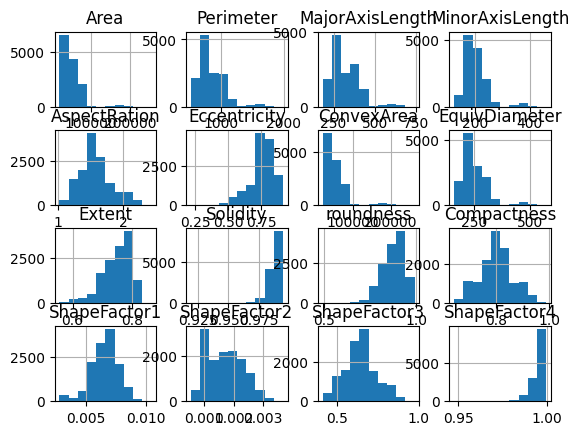

In [11]:
df.hist()

In [12]:
#matrice de corrélation
import plotly.express as px
correlation =  round(df.corr(numeric_only = True),  ndigits=2)

fig = px.imshow(correlation,
                text_auto=True,
                color_continuous_scale = 'Viridis',
                range_color=(0, 1),
                title='Correlation Matrix',
                width=800,
                height=800
            )

fig.update_xaxes(tickangle=40)

fig.show()

ConvexArea et Area sont les mêmes choix à faire


Distribution des classes:
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


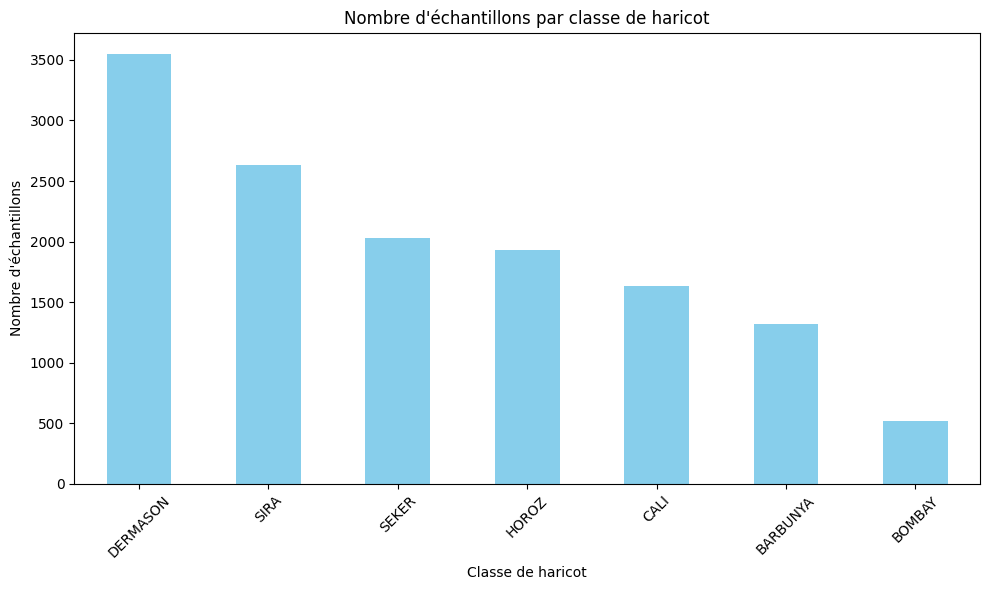

In [26]:
# Visualisation de la distribution des classes
print("\nDistribution des classes:")
class_counts = df['Class'].value_counts()
print(class_counts)

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Nombre d\'échantillons par classe de haricot')
plt.xlabel('Classe de haricot')
plt.ylabel('Nombre d\'échantillons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('distribution_classes.png')
plt.show()

Text(0, 0.5, 'Étendue')

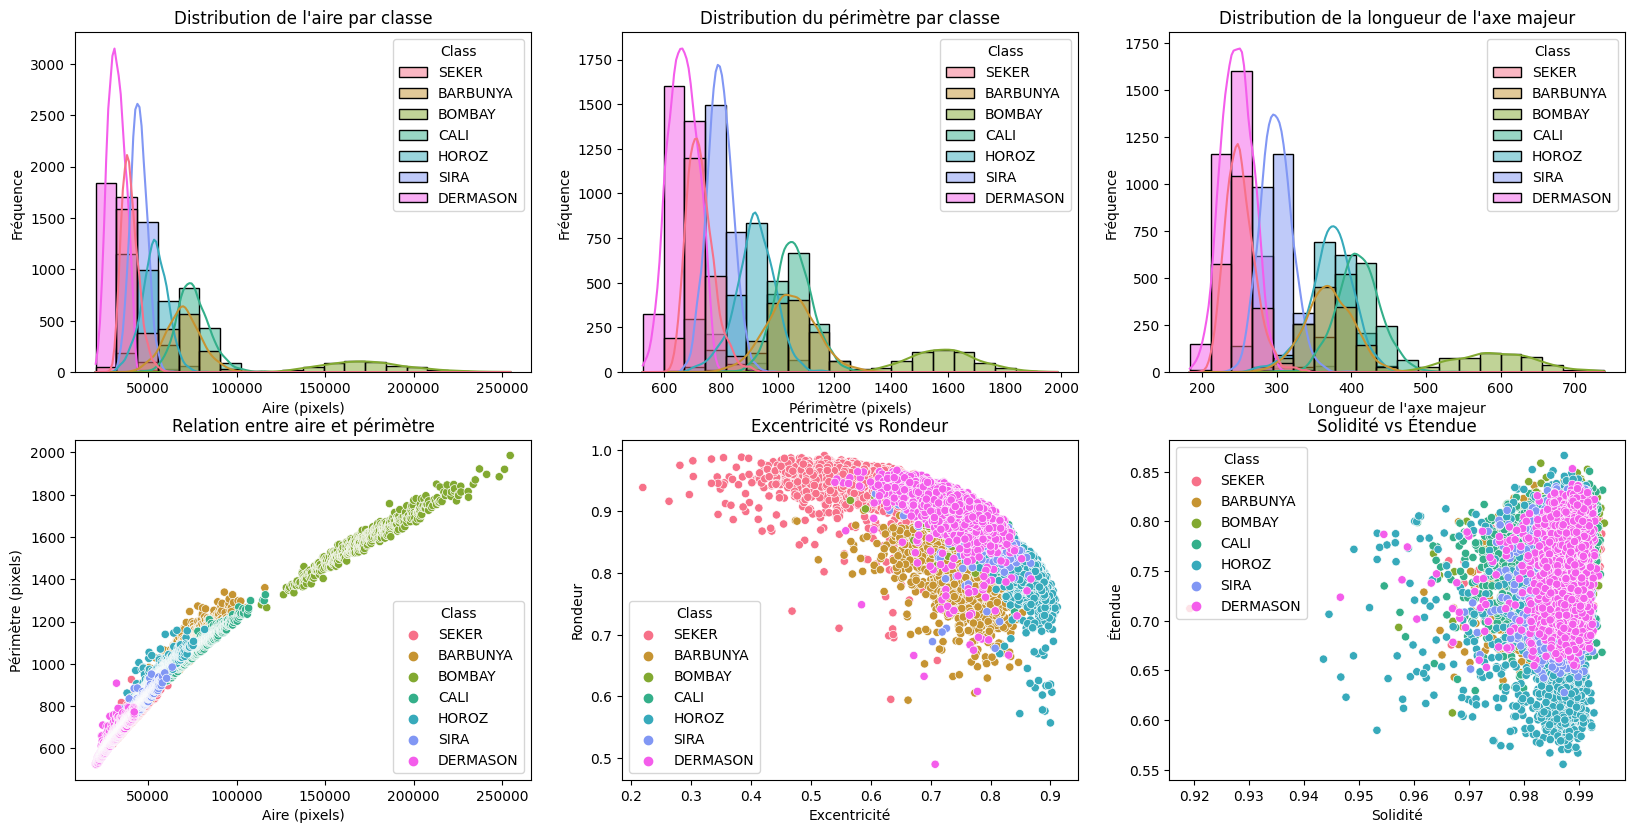

In [31]:
# Création d'une palette de couleurs pour différencier les classes
colors = sns.color_palette("husl", len(df['Class'].unique()))

# Histogrammes des principaux attributs
plt.figure(figsize=(20, 15))

# 1. Histogramme de l'aire (Area)
plt.subplot(3, 3, 1)
sns.histplot(data=df, x='Area', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution de l\'aire par classe', fontsize=12)
plt.xlabel('Aire (pixels)')
plt.ylabel('Fréquence')

# 2. Histogramme du périmètre (Perimeter)
plt.subplot(3, 3, 2)
sns.histplot(data=df, x='Perimeter', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution du périmètre par classe', fontsize=12)
plt.xlabel('Périmètre (pixels)')
plt.ylabel('Fréquence')

# 3. Histogramme de l'axe majeur (Major axis length)
plt.subplot(3, 3, 3)
sns.histplot(data=df, x='MajorAxisLength', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution de la longueur de l\'axe majeur', fontsize=12)
plt.xlabel('Longueur de l\'axe majeur')
plt.ylabel('Fréquence')

# 4. Graphique de dispersion entre Area et Perimeter
plt.subplot(3, 3, 4)
sns.scatterplot(data=df, x='Area', y='Perimeter', hue='Class', palette=colors)
plt.title('Relation entre aire et périmètre', fontsize=12)
plt.xlabel('Aire (pixels)')
plt.ylabel('Périmètre (pixels)')

# 5. Graphique de dispersion entre Eccentricity et Roundness
plt.subplot(3, 3, 5)
sns.scatterplot(data=df, x='Eccentricity', y='roundness', hue='Class', palette=colors)
plt.title('Excentricité vs Rondeur', fontsize=12)
plt.xlabel('Excentricité')
plt.ylabel('Rondeur')

# 6. Graphique de dispersion entre Solidity et Extent
plt.subplot(3, 3, 6)
sns.scatterplot(data=df, x='Solidity', y='Extent', hue='Class', palette=colors)
plt.title('Solidité vs Étendue', fontsize=12)
plt.xlabel('Solidité')
plt.ylabel('Étendue')